## Initialize the data required for the game

 * Player data
 * EPL live table
 * Type ahead search
 * Hint configuration file
 * Mapping from Country to Confederation

In [1]:
from setup import *


(players, player_map, filtered_players) = init_players()
type_ahead_helper = init_type_ahead(players)
hint_config = init_hint_config()
epl_table = init_epl_table()
confederation_mapping = init_confederation_mapping()

In [4]:
from guess_history import GuessHistory
from game_functions import *

def main():
    answer = pick_random_player(filtered_players)
    guess_history = GuessHistory(hint_config)
    
    while not is_game_over(guess_history):
        player_name_guess = ""
        while player_name_guess == "":
            input_name = input("PLAYER NAME: ")

            if input_name.upper() == "BREAK":
                raise ValueError('Breaking out of the program!')


            valid_names = type_ahead_helper.search_ahead(input_name)
            if len(valid_names) == 1:
                name = valid_names.pop()
                if already_guessed_player(name, guess_history):
                    print("DUMBASS! You already guessed that")
                else:
                    player_name_guess = name
            else:
                print("VAlID NAMES: " + ", ".join(valid_names))

        guess = player_map[player_name_guess]
        process_guess(answer, guess, guess_history, epl_table, confederation_mapping)
        
        display_player_photo(guess)
        guess_history.print_history(answer, epl_table, confederation_mapping)
    
    
    
    if guess_history.is_winner:
        print(answer.get_display_name() + " is correct! YOU WIN!!")
    else:
        print("YOU LOSE!")
        print("Correct answer was: " + answer.get_display_name())
        display_player_photo(answer)
        print(answer)

PLAYER NAME: Saka


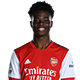

                                                                                   
         Name     Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
  Bukayo Saka  Arsenal  England         M   20       7      9        5           28
            X        X        ✓         ✓    ↑       X      X        X            ↓
PLAYER NAME: Saka
DUMBASS! You already guessed that
PLAYER NAME: Jack Ha


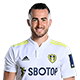

                                                                                          
           Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
    Bukayo Saka       Arsenal  England         M   20       7      9        5           28
              X             X        ✓         ✓    ↑       X      X        X            ↓
  Jack Harrison  Leeds United  England         M   25      22      5        1           27
              X             ↓        ✓         ✓    ↓       X      X        ✓            ✓
PLAYER NAME: Davies
VAlID NAMES: Ben Davies, Harvey Davies, Tom Davies
PLAYER NAME: Tom Davi


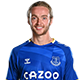

                                                                                          
           Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
    Bukayo Saka       Arsenal  England         M   20       7      9        5           28
              X             X        ✓         ✓    ↑       X      X        X            ↓
  Jack Harrison  Leeds United  England         M   25      22      5        1           27
              X             ↓        ✓         ✓    ↓       X      X        ✓            ✓
     Tom Davies       Everton  England         M   23      26      1        0            5
              X             ↓        ✓         ✓    ↓       X      ↓        ↑            X
PLAYER NAME: Mc
VAlID NAMES: Alex McCarthy, Dwight McNeil, James McArthur, James McAtee, John McGinn, Jon McCracken, Joseph McGlynn, Kenny McLean, Liam McCarron, Michael McGovern, Scott McTominay, Stuart McKinstry, Thomas McGill
PLAYER NAME: Mcneil


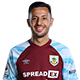

                                                                                          
           Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
    Bukayo Saka       Arsenal  England         M   20       7      9        5           28
              X             X        ✓         ✓    ↑       X      X        X            ↓
  Jack Harrison  Leeds United  England         M   25      22      5        1           27
              X             ↓        ✓         ✓    ↓       X      X        ✓            ✓
     Tom Davies       Everton  England         M   23      26      1        0            5
              X             ↓        ✓         ✓    ↓       X      ↓        ↑            X
  Dwight McNeil       Burnley  England         M   22      11      0        1           27
              ✓             ✓        ✓         ✓    ✓       ✓      ✓        ✓            ✓
Dwight McNeil is correct! YOU WIN!!


In [5]:
main()